In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [38]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X ** 2 + 0.9 * X + 2 + np.random.randn(200, 1)

[]

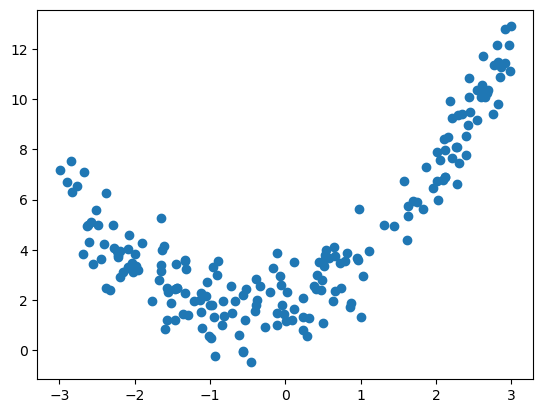

In [61]:
plt.scatter(X, y)
plt.plot()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
X_train

array([[-0.99635622],
       [-0.84192377],
       [ 2.01412445],
       [ 2.59984159],
       [-0.72754131],
       [-2.21899846],
       [-0.46211838],
       [ 2.39133347],
       [-0.56744567],
       [-0.99244862],
       [ 0.63263181],
       [-2.09109098],
       [ 2.8677274 ],
       [ 2.11801332],
       [ 0.48737796],
       [-0.39213774],
       [ 2.20551333],
       [-2.48663651],
       [-2.19296946],
       [ 2.39350441],
       [-0.37845076],
       [ 2.45055647],
       [-1.61341914],
       [-1.35421872],
       [ 0.44406304],
       [-2.02682993],
       [ 0.99932927],
       [-2.27845125],
       [ 2.43399191],
       [-1.11517841],
       [ 0.5172645 ],
       [ 1.69141503],
       [-0.11628966],
       [-2.09299007],
       [ 0.95656188],
       [ 0.86900655],
       [-0.27549014],
       [ 2.60290211],
       [-2.99135182],
       [-0.95969055],
       [ 2.27025914],
       [-0.51672695],
       [-1.6550435 ],
       [ 2.99367492],
       [-1.56564592],
       [-2

In [51]:
# First testing the model with Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
pred = model.predict(X_test)
r2_score(y_test, pred)

0.45319621841673763

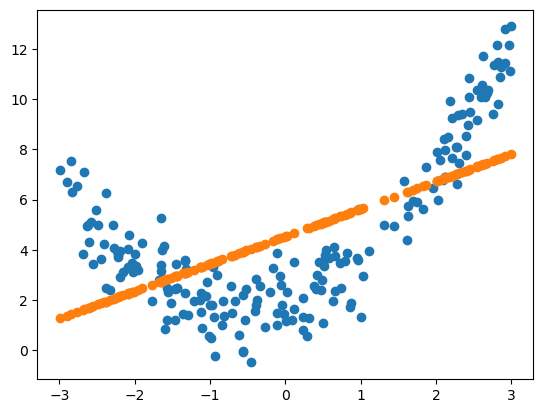

In [73]:
plt.scatter(X, y)
plt.scatter(X_train, model.predict(X_train))

In [71]:
X_train.shape, X_test.shape

((160, 1), (40, 1))

### Implementing polynomial features

In [102]:
# degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_transf = poly.fit_transform(X_train)
X_test_transf = poly.transform(X_test)

In [104]:
lr = LinearRegression()
lr.fit(X_train_transf, y_train)
print(lr.coef_, lr.intercept_)

[[0.         0.93816681 0.84003961]] [1.91575631]


In [106]:
preds = lr.predict(X_test_transf)

In [108]:
r2_score(y_test, preds)

0.9510309131419099

As we can see, our model's performance has drastically improved when we used polynomial LR with degree 2.

In [113]:
X_train[0]

array([-0.99635622])

In [115]:
X_train_transf[0]

array([ 1.        , -0.99635622,  0.99272571])

In [127]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

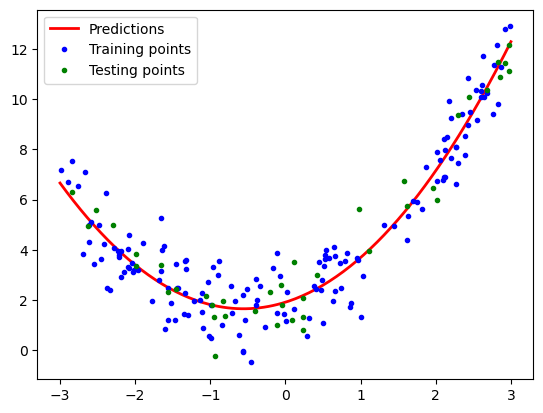

In [151]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.", label="Training points")
plt.plot(X_test, y_test, "g.", label="Testing points")
plt.legend()
plt.show()

### 3D Polynomial Regression

In [160]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x ** 2 + y ** 2 + 0.2 * x + 0.2 * y + 0.1 * x * y + 2 + np.random.randn(100, 1)

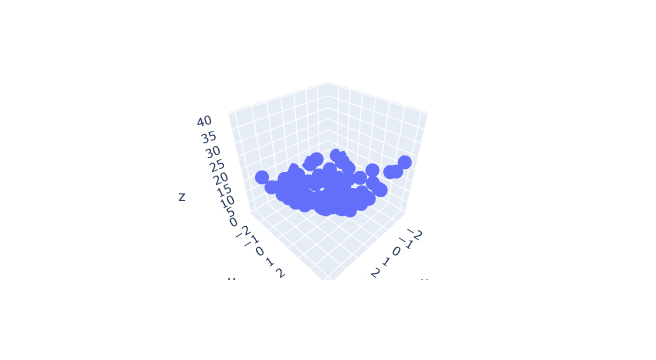

In [168]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y = y.ravel(), z = z.ravel())
fig.show()

In [ ]:
lr = LinearRegression()
